## implementation of KMeans

In [1]:
class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
class Kmeans(cluster):
    
    def __init__(self, K=5, max_iters=100, balanced = False):
        self.K = K
        self.max_iters = max_iters
        self.balanced = balanced
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []
    
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # randomly place the k centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False) 
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Repeat until converged:
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids) and (balanced is False):
                break
            elif self._is_converged(centroids_old, self.centroids) and (balanced is True):
                self._make_cluster_balanced(self.centroids, self.clusters, self.balanced)
            
                

            # Classify samples as the index of their clusters
            return self._get_cluster_labels(self.clusters), self.centroids
        
    def _make_cluster_balanced(self, centroids, clusters, balanced):
        pass
        
        
    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
        
    def _get_centroids(self, clusters):
            # assign mean value of clusters to centroids
            centroids = np.zeros((self.K, self.n_features))
            for cluster_idx, cluster in enumerate(clusters):
                cluster_mean = np.mean(self.X[cluster], axis=0)
                centroids[cluster_idx] = cluster_mean
            return centroids
    
    def _is_converged(self, centroids_old, centroids):
            # distances between each old and new centroids, fol all centroids
            distances = [
                euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
            ]
            return sum(distances) == 0
        
    def _get_cluster_labels(self, clusters):
            # each sample will get the label of the cluster it was assigned to
            labels = np.empty(self.n_samples) # label is just the index of centroids

            for cluster_idx, cluster in enumerate(clusters):
                for sample_index in cluster:
                    labels[sample_index] = cluster_idx
            return labels
        
    def plot(self):
            fig, ax = plt.subplots(figsize=(12, 8))

            for i, index in enumerate(self.clusters):
                point = self.X[index].T
                ax.scatter(*point)

            for point in self.centroids:
                ax.scatter(*point, marker="x", color="black", linewidth=2)

            plt.show()
        

## import and edit the historical weather data

In [4]:
import pandas as pd

df = pd.read_csv('historical-weather.csv')
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,100,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,200,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,300,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,400,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,1586800,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,1586900,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,1587000,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,1587100,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [5]:
# drop the rowID column to better visualize the results, since rowID is not related to the content of the dataset
df_temp = df.drop(['rowID'], axis = 1)
df_temp

,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,2011-09-10 01:40:49,911.8,62.96,95.0,2.3,106.0,2.5,88.0,1.9,0.0,0.0,63.9
2,2011-09-10 03:20:49,911.4,68.00,53.0,0.3,69.0,0.5,19.0,0.2,0.0,0.0,33.4
3,2011-09-10 05:00:49,911.4,64.22,191.0,2.8,197.0,2.9,185.0,2.6,0.0,0.0,58.2
4,2011-09-10 06:40:49,912.2,52.70,181.0,1.5,191.0,2.0,164.0,1.2,0.0,0.0,89.8
...,...,...,...,...,...,...,...,...,...,...,...,...
15868,2014-09-10 16:23:29,914.3,77.18,225.0,5.2,238.0,6.0,214.0,4.4,0.0,0.0,43.2
15869,2014-09-10 18:03:29,914.4,77.00,190.0,1.5,196.0,1.7,185.0,1.4,0.0,0.0,42.8
15870,2014-09-10 19:43:29,914.9,75.92,344.0,0.4,352.0,0.6,336.0,0.3,0.0,0.0,43.9
15871,2014-09-10 21:23:29,915.7,75.38,13.0,1.5,24.0,1.7,4.0,1.2,0.0,0.0,46.7


In [6]:
corr = df_temp.corr()
corr

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
air_pressure,1.000000,0.046296,-0.197714,-0.077352,-0.217877,-0.060287,-0.142218,-0.094720,-0.080481,-0.112794,-0.375241
air_temp,0.046296,1.000000,-0.014719,-0.209340,-0.046445,-0.209983,0.025727,-0.201580,-0.059231,-0.113693,-0.620038
avg_wind_direction,-0.197714,-0.014719,1.000000,-0.027794,0.715839,-0.028626,0.621677,-0.031545,0.015005,0.025888,0.206526
avg_wind_speed,-0.077352,-0.209340,-0.027794,1.000000,0.022464,0.985016,-0.114903,0.971058,0.089419,0.091910,0.059483
max_wind_direction,-0.217877,-0.046445,0.715839,0.022464,1.000000,0.021483,0.421736,0.015318,0.018410,0.036116,0.239168
max_wind_speed,-0.060287,-0.209983,-0.028626,0.985016,0.021483,1.000000,-0.110048,0.926046,0.088740,0.097858,0.047763
min_wind_direction,-0.142218,0.025727,0.621677,-0.114903,0.421736,-0.110048,1.000000,-0.118068,0.004749,0.007557,0.133838
min_wind_speed,-0.094720,-0.201580,-0.031545,0.971058,0.015318,0.926046,-0.118068,1.000000,0.076147,0.074413,0.071531
rain_accumulation,-0.080481,-0.059231,0.015005,0.089419,0.018410,0.088740,0.004749,0.076147,1.000000,0.553623,0.067226
rain_duration,-0.112794,-0.113693,0.025888,0.091910,0.036116,0.097858,0.007557,0.074413,0.553623,1.000000,0.129050


In [7]:
# find what has the highest correlation to wind direction
corr['avg_wind_direction'].sort_values(ascending = False)

avg_wind_direction    1.000000
max_wind_direction    0.715839
min_wind_direction    0.621677
relative_humidity     0.206526
rain_duration         0.025888
rain_accumulation     0.015005
air_temp             -0.014719
avg_wind_speed       -0.027794
max_wind_speed       -0.028626
min_wind_speed       -0.031545
air_pressure         -0.197714
Name: avg_wind_direction, dtype: float64

In [8]:
# find what has the highest correlation to wind speed
corr['avg_wind_speed'].sort_values(ascending = False)

avg_wind_speed        1.000000
max_wind_speed        0.985016
min_wind_speed        0.971058
rain_duration         0.091910
rain_accumulation     0.089419
relative_humidity     0.059483
max_wind_direction    0.022464
avg_wind_direction   -0.027794
air_pressure         -0.077352
min_wind_direction   -0.114903
air_temp             -0.209340
Name: avg_wind_speed, dtype: float64

In [9]:
# find what has the highest correlation to humidity
corr['relative_humidity'].sort_values(ascending = False)

relative_humidity     1.000000
max_wind_direction    0.239168
avg_wind_direction    0.206526
min_wind_direction    0.133838
rain_duration         0.129050
min_wind_speed        0.071531
rain_accumulation     0.067226
avg_wind_speed        0.059483
max_wind_speed        0.047763
air_pressure         -0.375241
air_temp             -0.620038
Name: relative_humidity, dtype: float64

In [10]:
# find what has the highest correlation to rain duration
corr['rain_duration'].sort_values(ascending = False)

rain_duration         1.000000
rain_accumulation     0.553623
relative_humidity     0.129050
max_wind_speed        0.097858
avg_wind_speed        0.091910
min_wind_speed        0.074413
max_wind_direction    0.036116
avg_wind_direction    0.025888
min_wind_direction    0.007557
air_pressure         -0.112794
air_temp             -0.113693
Name: rain_duration, dtype: float64

In [11]:
# will use features: relative_humidity and max_wind_direction for KMeans 
humidity = df['relative_humidity']
humidity

0        60.5
1        63.9
2        33.4
3        58.2
4        89.8
         ... 
15868    43.2
15869    42.8
15870    43.9
15871    46.7
15872    47.8
Name: relative_humidity, Length: 15873, dtype: float64

In [12]:
max_wind_direc = df['max_wind_direction']
max_wind_direc

0        106.0
1        106.0
2         69.0
3        197.0
4        191.0
         ...  
15868    238.0
15869    196.0
15870    352.0
15871     24.0
15872    348.0
Name: max_wind_direction, Length: 15873, dtype: float64

In [13]:
data = {
    'Relative Humidity' : humidity,
    'Max Wind Direction' : max_wind_direc
}
data

{'Relative Humidity': 0        60.5
 1        63.9
 2        33.4
 3        58.2
 4        89.8
          ... 
 15868    43.2
 15869    42.8
 15870    43.9
 15871    46.7
 15872    47.8
 Name: relative_humidity, Length: 15873, dtype: float64,
 'Max Wind Direction': 0        106.0
 1        106.0
 2         69.0
 3        197.0
 4        191.0
          ...  
 15868    238.0
 15869    196.0
 15870    352.0
 15871     24.0
 15872    348.0
 Name: max_wind_direction, Length: 15873, dtype: float64}

In [14]:
X = pd.DataFrame(data)
X

,Relative Humidity,Max Wind Direction
0,60.5,106.0
1,63.9,106.0
2,33.4,69.0
3,58.2,197.0
4,89.8,191.0
...,...,...
15868,43.2,238.0
15869,42.8,196.0
15870,43.9,352.0
15871,46.7,24.0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Relative Humidity   15873 non-null  float64
 1   Max Wind Direction  15870 non-null  float64
dtypes: float64(2)
memory usage: 248.1 KB


In [16]:
X.shape

(15873, 2)

In [17]:
X = X.dropna()
X

,Relative Humidity,Max Wind Direction
0,60.5,106.0
1,63.9,106.0
2,33.4,69.0
3,58.2,197.0
4,89.8,191.0
...,...,...
15868,43.2,238.0
15869,42.8,196.0
15870,43.9,352.0
15871,46.7,24.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15870 entries, 0 to 15872
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Relative Humidity   15870 non-null  float64
 1   Max Wind Direction  15870 non-null  float64
dtypes: float64(2)
memory usage: 372.0 KB


In [19]:
X.shape

(15870, 2)

In [20]:
X = X.to_numpy()

In [21]:
X.shape

(15870, 2)

## Performance Comparison

## test on the historical weather data

In [22]:
k = Kmeans(K = 5, max_iters = 100, balanced = False)
k

In [23]:
fit = k.fit(X)

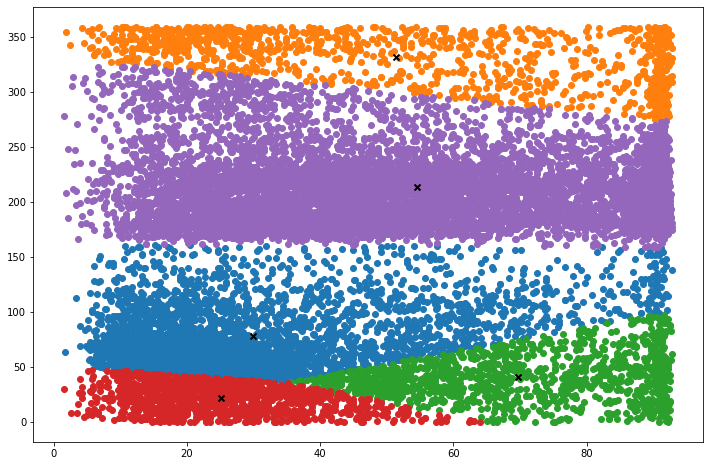

In [24]:
k.plot()

#### scikit-learn toolkit

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
km = KMeans(n_clusters = 5)
y_predicted = km.fit_predict(X)
y_predicted

array([3, 3, 3, ..., 2, 1, 2], dtype=int32)

In [26]:
df_weather = pd.DataFrame(X, columns = ['Relative Humidity', 'Max Wind Direction'])
df_weather

,Relative Humidity,Max Wind Direction
0,60.5,106.0
1,63.9,106.0
2,33.4,69.0
3,58.2,197.0
4,89.8,191.0
...,...,...
15865,43.2,238.0
15866,42.8,196.0
15867,43.9,352.0
15868,46.7,24.0


In [27]:

df_weather['cluster'] = y_predicted
df_weather.head()

,Relative Humidity,Max Wind Direction,cluster
0,60.5,106.0,3
1,63.9,106.0,3
2,33.4,69.0,3
3,58.2,197.0,4
4,89.8,191.0,4


In [28]:
km.cluster_centers_

array([[ 34.75217842, 200.21706432],
       [ 40.07132262,  34.80346106],
       [ 44.42116136, 315.30485762],
       [ 32.82123439,  84.36774431],
       [ 75.66180539, 211.73341149]])

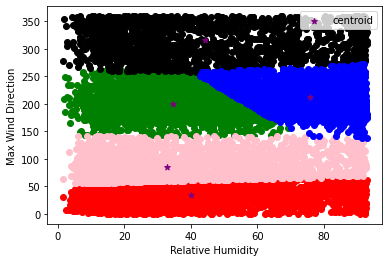

In [29]:
df1 = df_weather[df_weather.cluster==0]
df2 = df_weather[df_weather.cluster==1]
df3 = df_weather[df_weather.cluster==2]
df4 = df_weather[df_weather.cluster==3]
df5 = df_weather[df_weather.cluster==4]
plt.scatter(df1['Relative Humidity'],df1['Max Wind Direction'],color='green')
plt.scatter(df2['Relative Humidity'],df2['Max Wind Direction'],color='red')
plt.scatter(df3['Relative Humidity'],df3['Max Wind Direction'],color='black')
plt.scatter(df4['Relative Humidity'],df4['Max Wind Direction'],color='pink')
plt.scatter(df5['Relative Humidity'],df5['Max Wind Direction'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Relative Humidity')
plt.ylabel('Max Wind Direction')
plt.legend()

The differences between the two outputs are similar in terms of separating the clusters horizontally. The differences are that the clusters are divided in a different way. This may be because the random initialization has placed the initial centroids in different places. 

## test the KMeans implementation using scikit-learn

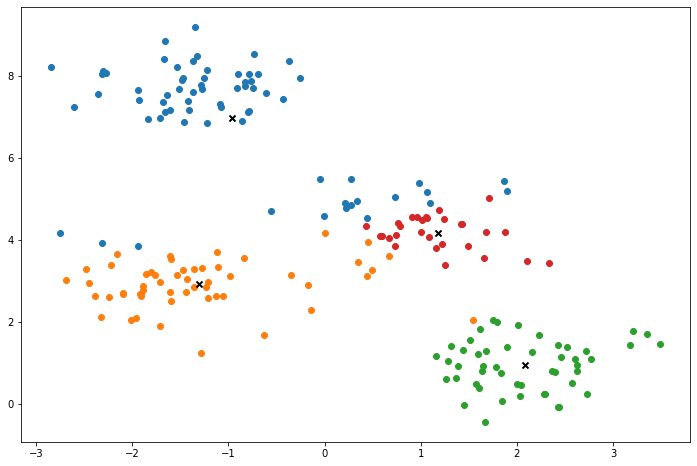

In [30]:
from sklearn.datasets import make_blobs
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
k = Kmeans(K=4, max_iters=100, balanced = False)
cluster_assignments_fit = k.fit(X)

k.plot()

In [31]:
cluster_assignments_fit

(array([2., 1., 3., 0., 2., 0., 1., 1., 3., 3., 3., 2., 1., 1., 2., 0., 0.,
        0., 0., 1., 0., 1., 2., 1., 2., 2., 0., 2., 2., 3., 0., 0., 1., 2.,
        1., 0., 1., 3., 0., 0., 0., 0., 0., 3., 2., 1., 3., 0., 0., 3., 0.,
        1., 1., 0., 3., 0., 1., 2., 0., 2., 0., 3., 2., 3., 0., 3., 2., 0.,
        0., 1., 2., 2., 3., 1., 1., 0., 1., 1., 2., 2., 0., 0., 2., 1., 1.,
        1., 3., 2., 1., 1., 0., 0., 0., 0., 0., 2., 1., 0., 3., 0., 0., 2.,
        2., 0., 0., 1., 3., 2., 2., 1., 0., 1., 1., 2., 2., 3., 1., 1., 0.,
        1., 0., 1., 3., 2., 1., 1., 3., 1., 2., 3., 0., 2., 1., 0., 0., 1.,
        0., 0., 2., 0., 2., 1., 2., 2., 1., 2., 3., 2., 0., 0., 0., 0., 3.,
        1., 2., 0., 0., 1., 0., 2., 0., 2., 2., 1., 1., 0., 3., 2., 2., 1.,
        2., 3., 1., 0., 0., 0., 0., 0., 1., 0., 1., 2., 3., 2., 3., 1., 1.,
        0., 0., 0., 2., 2., 3., 0., 1., 1., 1., 3., 0., 2.]),
 array([[-0.96496338,  6.95965788],
        [-1.30098662,  2.91659135],
        [ 2.08276355,  0.95240

## test extended k-Means

## Choose and run clustering algorithms

### Chicago taxi data (use k-Means)

In [32]:
df_chicago = pd.read_csv('/Users/caracao/Desktop/USFCA/CS663 Machine Learning/Assignment-01/chicago_taxi.csv')
df_chicago

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,fec6b8b1c5cd7af9e6dc4e9c8c46fb08987f2e9c,56a1119c6ca57e39525cf06829f9ecff553cf4b5ac2482...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,322.0,0.80,NaN,NaN,8.0,28.0,...,0.0,5.75,Cash,Medallion Leasin,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.874005,-87.663518,POINT (-87.6635175498 41.874005383)
1,ff5cad1f181d44fe60b9d0a1330f78269511d54a,6acd828b5cde8b4529317e8eda5b4fb9663fa81d1143c9...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,671.0,5.17,NaN,NaN,8.0,3.0,...,0.0,16.75,Credit Card,Chicago Carriage Cab Corp,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
2,fbe685844176dd7822b6e256efce7fa3f8909e4b,b968bad5a2daed924a10e8ec4fb35513e060a076c575f7...,01/24/2020 12:15:00 AM,01/24/2020 12:30:00 AM,960.0,0.40,NaN,NaN,8.0,3.0,...,0.0,22.60,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
3,fddd99b2c6db17848390d4b57e7fff970e22b413,a4e718943931c99476ac0b332bb99261dd8e15994076bf...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,120.0,0.00,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,4.00,Cash,Blue Ribbon Taxi Association Inc.,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
4,f9f914b68a3ddb07fba1acf5bfcb5e1c7bb5f3bc,cbdd490649df25aa771979bed8930b199d27a990ccdb42...,01/24/2020 12:15:00 AM,01/24/2020 12:15:00 AM,360.0,1.40,NaN,NaN,28.0,8.0,...,1.0,7.75,No Charge,Star North Management LLC,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292777,5bbfd687aafb778e609425ba4621d9e291ef44c0,919ad1eb29141ee529f65193c1347a616239d89cd8c5e1...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,420.0,0.10,NaN,NaN,28.0,31.0,...,4.5,12.00,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.850266,-87.667569,POINT (-87.667569312 41.8502663663)
292778,5b49d22a619c543597c7e09731772f2453f6fbf3,5e6ba3d77c1e1597624402bd204e81b4acbc3bdb103741...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,1020.0,4.60,NaN,NaN,28.0,8.0,...,0.0,17.80,Credit Card,Taxi Affiliation Services,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
292779,587c59ccd2e9c2e0223817faaa58427184a642c0,111d9e472136f46b99422f1e976e81de485f57c2f7f3a8...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,720.0,2.20,1.703108e+10,1.703133e+10,8.0,33.0,...,0.0,9.75,Cash,Star North Management LLC,41.892508,-87.626215,POINT (-87.6262149064 41.8925077809),41.859350,-87.617358,POINT (-87.6173580061 41.859349715)
292780,585d981c08bb404e5ec19b470a67f573a16152da,2c6ef81b0ba1f2bbe58cb63f171b872e9e3f53d4c34a3c...,01/31/2020 11:45:00 PM,02/01/2020 12:00:00 AM,805.0,3.34,NaN,NaN,8.0,7.0,...,0.0,13.80,Mobile,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [33]:
# from sklearn.cluster import KMeans
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler
corr = df_chicago.corr()

In [34]:
corr['Pickup Centroid Latitude'].sort_values(ascending = False)

Pickup Centroid Latitude      1.000000
Dropoff Centroid Latitude     0.481779
Trip Miles                    0.258905
Tips                          0.236563
Pickup Community Area         0.171768
Pickup Census Tract           0.160227
Trip Seconds                  0.111466
Extras                        0.055017
Trip Total                    0.040689
Fare                          0.028374
Tolls                         0.013887
Dropoff Census Tract         -0.004901
Dropoff Community Area       -0.129051
Dropoff Centroid Longitude   -0.209578
Pickup Centroid Longitude    -0.619108
Name: Pickup Centroid Latitude, dtype: float64

In [35]:
# use Pickup Centroid Latitude and Dropoff Centroid Latitude
pickup_latitude = df_chicago['Pickup Centroid Latitude']
pickup_latitude

0         41.899602
1         41.899602
2         41.899602
3         41.892508
4         41.874005
            ...    
292777    41.874005
292778    41.874005
292779    41.892508
292780    41.899602
292781          NaN
Name: Pickup Centroid Latitude, Length: 292782, dtype: float64

In [36]:
drop_latitude = df_chicago['Dropoff Centroid Latitude']
data = {
    'Pickup Centroid Latitude' : pickup_latitude,
    'Dropoff Centroid Latitude' : drop_latitude
}
data

{'Pickup Centroid Latitude': 0         41.899602
 1         41.899602
 2         41.899602
 3         41.892508
 4         41.874005
             ...    
 292777    41.874005
 292778    41.874005
 292779    41.892508
 292780    41.899602
 292781          NaN
 Name: Pickup Centroid Latitude, Length: 292782, dtype: float64,
 'Dropoff Centroid Latitude': 0         41.874005
 1         41.965812
 2         41.965812
 3         41.892508
 4         41.899602
             ...    
 292777    41.850266
 292778    41.899602
 292779    41.859350
 292780    41.922686
 292781          NaN
 Name: Dropoff Centroid Latitude, Length: 292782, dtype: float64}

In [37]:
X = pd.DataFrame(data)
X = X.dropna()
X

,Pickup Centroid Latitude,Dropoff Centroid Latitude
0,41.899602,41.874005
1,41.899602,41.965812
2,41.899602,41.965812
3,41.892508,41.892508
4,41.874005,41.899602
...,...,...
292776,41.944227,41.922686
292777,41.874005,41.850266
292778,41.874005,41.899602
292779,41.892508,41.859350


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264684 entries, 0 to 292780
Data columns (total 2 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Pickup Centroid Latitude   264684 non-null  float64
 1   Dropoff Centroid Latitude  264684 non-null  float64
dtypes: float64(2)
memory usage: 6.1 MB


In [39]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(X)
y_predicted

array([2, 1, 1, ..., 2, 2, 2], dtype=int32)

In [40]:
km.cluster_centers_

array([[41.8114465 , 41.81064292],
       [41.96354122, 41.93973875],
       [41.88706219, 41.89263872]])

In [41]:
X['cluster'] = y_predicted
X.head()

,Pickup Centroid Latitude,Dropoff Centroid Latitude,cluster
0,41.899602,41.874005,2
1,41.899602,41.965812,1
2,41.899602,41.965812,1
3,41.892508,41.892508,2
4,41.874005,41.899602,2


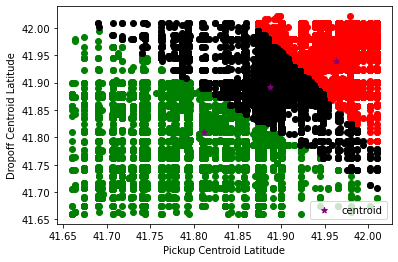

In [42]:
df1 = X[X.cluster==0]
df2 = X[X.cluster==1]
df3 = X[X.cluster==2]
plt.scatter(df1['Pickup Centroid Latitude'],df1['Dropoff Centroid Latitude'],color='green')
plt.scatter(df2['Pickup Centroid Latitude'],df2['Dropoff Centroid Latitude'],color='red')
plt.scatter(df3['Pickup Centroid Latitude'],df3['Dropoff Centroid Latitude'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Pickup Centroid Latitude')
plt.ylabel('Dropoff Centroid Latitude')
plt.legend()

#### Explaination
1. I am only using two dimensional data for this analysis, and I would like to group the data into clusters to see the relation. That's why I have chosen to use k-Means algorithm.
2. Pre-processing: used corr() to found out the two columns that have high correlation (Dropoff Centroid Latitude and Pickup Centroid Latitude) to perform the k-Means analysis.
3. 3 clusters were generated. They were separated by:
 - low dropoff and pickup latitude
 - lower dropoff and pickup latitude
 - high dropoff and pickup latitude
4. The clusters are almost as I expected. The algorithm have given me a clear distribution of the 3 clusters.

### Finnish location data (use k-Means)

In [43]:
df_finnish = pd.read_csv('/Users/caracao/Desktop/USFCA/CS663 Machine Learning/Assignment-01/MopsiLocationsUntil2012-Finland.csv')
df_finnish

,625983,297439
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


In [44]:
df_finnish.columns = ['latitude', 'longitude']
df_finnish

,latitude,longitude
0,626146,297440
1,626144,297456
2,626004,297394
3,626018,297437
4,626038,297518
...,...,...
13461,626042,297444
13462,625977,297443
13463,626050,297404
13464,625995,297426


In [45]:
corr = df_finnish.corr()
corr

,latitude,longitude
latitude,1.000000,0.351542
longitude,0.351542,1.000000


In [46]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_finnish[['latitude','longitude']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [47]:
df_finnish['cluster'] = y_predicted
df_finnish.head()

,latitude,longitude,cluster
0,626146,297440,0
1,626144,297456,0
2,626004,297394,0
3,626018,297437,0
4,626038,297518,0


In [48]:
km.cluster_centers_

array([[626279.08434292, 297866.4755387 ],
       [619189.61657459, 227433.99558011],
       [627799.74126779, 276626.08020699],
       [672426.14285714, 260883.42016807],
       [607354.10163551, 257235.26401869]])

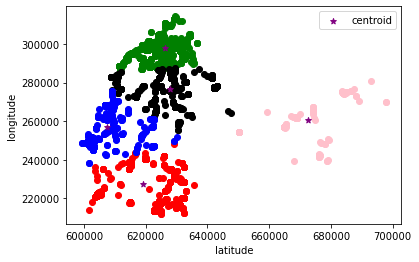

In [49]:
df1 = df_finnish[df_finnish.cluster==0]
df2 = df_finnish[df_finnish.cluster==1]
df3 = df_finnish[df_finnish.cluster==2]
df4 = df_finnish[df_finnish.cluster==3]
df5 = df_finnish[df_finnish.cluster==4]
plt.scatter(df1.latitude,df1.longitude,color='green')
plt.scatter(df2.latitude,df2.longitude,color='red')
plt.scatter(df3.latitude,df3.longitude,color='black')
plt.scatter(df4.latitude,df4.longitude,color='pink')
plt.scatter(df5.latitude,df5.longitude,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.legend()

#### Explaination
1. There is only 2 columns in this dataset. The only two features are the latitude and longitude. K-Means might be the best algorithm to analysis small dimension data without to much noise.
2. Pre-processing: Converted the data from the website to a csv file. Not much preprocessing needed.
3.  5 clusters were generated. The left huge cluster (red, blue, black and green) were separated by longitude mainly. 
    The pink cluster was separated by latitude.
     
4. The clustering was not as I expected. I was hoping for a more distinct difference among the clusters. 